In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec
from scipy.special import boxcox1p
import warnings

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.compose import make_column_transformer
from itertools import combinations 

from scipy import stats
from scipy.stats import norm, kurtosis, skew


from house_utils import data_summary, features_profile, plot_feats


# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices

from sklearn.model_selection import StratifiedKFold

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import make_pipeline

warnings.filterwarnings("ignore") # ignoring annoying warnings

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
pd.set_option("display.max_rows", 500)

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 

import pandas_profiling

###TO PREVENT SCROLLING : SHIFT + O

In [2]:
#I. DATA PREPARATION

In [3]:
# 1. READ THE WHOLE DATASET:
# We load and read the whole dataset (train + test) because we need to clean and preprocess all of it!!!!
#All the procedures must be applied to the entire dataset before split it!

#Step 1: Load train and test sets

df = pd.read_csv("diabetes.csv")
# test = pd.read_csv("test.csv")

#Target
target = "Outcome"

# #Change target type
# dict = {"Y":1, "N":0}
# train[target] = train[target].map(dict)

#Remove Loan_ID

# train.drop("Loan_ID", axis = 1, inplace = True)
# test.drop("Loan_ID", axis = 1, inplace = True)

#Test set creation
y = df.pop(target)
X = df

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

train = pd.concat((X_t, y_t), axis = 1)
test = pd.concat((X_test, y_test), axis = 1)


In [4]:
# pandas_profiling.ProfileReport(train)

In [5]:
from sklearn.dummy import DummyClassifier
# y = train.pop(target)
# X = train
# clf_dummy = DummyClassifier(strategy= "most_frequent")
# X_train, X_test, y_train, y_test = train_test_split(X,y)
# clf_dummy.fit(X_train, y_train)
# clf_dummy.score(X_test, y_test)




In [6]:
# results = []
# y = train.pop(target)
# X = train
# for i in range(1,1000):
#     clf_dummy = DummyClassifier(strategy= "most_frequent")
#     X_train, X_test, y_train, y_test = train_test_split(X,y)
#     clf_dummy.fit(X_train, y_train)
#     results.append(clf_dummy.score(X_test, y_test))
    
# sns.histplot(results)
    
# print(np.array(results).mean(), np.array(results).std())

In [7]:
# #RANDOM FOREST
# results = []
# for i in range(1,1000):
#     rfc = RandomForestClassifier()
#     X_train, X_test, y_train, y_test = train_test_split(X,y)

#     X_train = pd.get_dummies(X_train, drop_first=True)
#     X_test = pd.get_dummies(X_test, drop_first=True)
#     X_train.fillna(X_train.mean(), inplace = True)
#     X_test.fillna(X_test.mean(), inplace = True)
#     print(X_test.shape, X_train.shape)
    
#     rfc.fit(X_train, y_train)
#     results.append(rfc.score(X_test, y_test))
    
# sns.histplot(results)
    
# print(np.array(results).mean(), np.array(results).std())

In [8]:
train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0000,0.3040,21,0
618,9,112,82,24,0,28.2000,1.2820,50,1
346,1,139,46,19,83,28.7000,0.6540,22,0
294,0,161,50,0,0,21.9000,0.2540,65,0
231,6,134,80,37,370,46.2000,0.2380,46,1


In [9]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.0000,614.0000,614.0000,614.0000,614.0000,614.0000,614.0000,614.0000,614.0000
mean,3.7427,120.8550,69.4153,20.3990,81.4381,31.9834,0.4692,32.9072,0.3469
std,3.3133,32.0351,18.5126,15.4340,116.2348,7.7406,0.3368,11.5034,0.4764
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780,21.0000,0.0000
25%,1.0000,100.0000,64.0000,0.0000,0.0000,27.1000,0.2415,24.0000,0.0000
50%,3.0000,117.0000,72.0000,23.0000,42.5000,32.0000,0.3725,29.0000,0.0000
75%,6.0000,139.0000,80.0000,32.0000,129.7500,36.3750,0.6138,40.0000,1.0000
max,17.0000,199.0000,122.0000,63.0000,846.0000,67.1000,2.4200,81.0000,1.0000


In [10]:
test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,154.0000,154.0000,154.0000,154.0000,154.0000,154.0000,154.0000,154.0000,154.0000
mean,4.2532,121.0519,67.8701,21.0844,73.2662,32.0292,0.4827,34.5714,0.3571
std,3.5674,31.8259,22.4301,17.9144,111.3343,8.4587,0.3092,12.6852,0.4807
min,0.0000,62.0000,0.0000,0.0000,0.0000,0.0000,0.1020,21.0000,0.0000
25%,1.2500,96.0000,62.0000,0.0000,0.0000,28.2250,0.2472,24.0000,0.0000
50%,3.0000,112.0000,72.0000,26.0000,0.0000,32.8500,0.3725,29.5000,0.0000
75%,7.0000,146.0000,78.0000,33.0000,125.7500,36.9750,0.6793,42.0000,1.0000
max,13.0000,197.0000,114.0000,99.0000,579.0000,53.2000,1.3900,67.0000,1.0000


In [11]:
#2. Check for duplicates
train.duplicated().sum()

0

In [12]:
#3. Separate datatypes
categorical = train.select_dtypes(["object", "bool"])
numerical = train.select_dtypes(["float", "int"])

In [13]:
#4. Initial data cleaning
"""Examples of things to consider...
• Are there categorical columns that should be numerical?
• Is the data in the first few rows consistent with the name of the feature?
• Are there lists or dictionaries packed into one feature?
• Are dates in the date data type?"""

'Examples of things to consider...\n• Are there categorical columns that should be numerical?\n• Is the data in the first few rows consistent with the name of the feature?\n• Are there lists or dictionaries packed into one feature?\n• Are dates in the date data type?'

In [14]:
#Observation: there are zero values in features that are inconsistent with their nature. 
#They must be imputed as NaNs for the time being

#Replacing

train[["Glucose", "Insulin", "BloodPressure", "SkinThickness", "BMI"]] = train[["Glucose", "Insulin", "BloodPressure", "SkinThickness", "BMI"]].replace(0, np.NaN)

test[["Glucose", "Insulin", "BloodPressure", "SkinThickness", "BMI"]] = test[["Glucose", "Insulin", "BloodPressure", "SkinThickness", "BMI"]].replace(0, np.NaN)


In [15]:
#Changing some datatypes:
#Credit_History should be categorical
#Update for train and test
#train["Credit_History"] = train["Credit_History"].astype("object")
#test["Credit_History"] = test["Credit_History"].astype("object")

#Re-separate columns
categorical = train.select_dtypes(["object", "bool"])
numerical = train.select_dtypes(["float", "int"])

In [16]:
#Separate columns for nominal, ordinal and numerical features for analysis
# nominal = ['Loan_ID', 'Gender', 'Married', 'Self_Employed' ]
# ordinal = ["Dependents", 'Education','Property_Area']
# num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History']

# nominal.remove("Loan_ID")


In [17]:
#II. EXPLORATORY DATA ANALYSIS
#Utils
def bar_plot_feat(data, cols): #bar plot of features
    for col in cols:
        data[col].value_counts(normalize = True).plot.bar(figsize = (7,4), title = col)
        plt.show()
        
def distplot_feat(data, cols):
    for col in cols:
        sns.distplot(data[col])
        plt.show()
        data[col].plot.box(figsize=(10,4))
        plt.show()
        
        
def bivariate(data, cols, target):
    for col in cols:
        df=pd.crosstab(data[col],data[target])
        df.div(df.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
        plt.show()


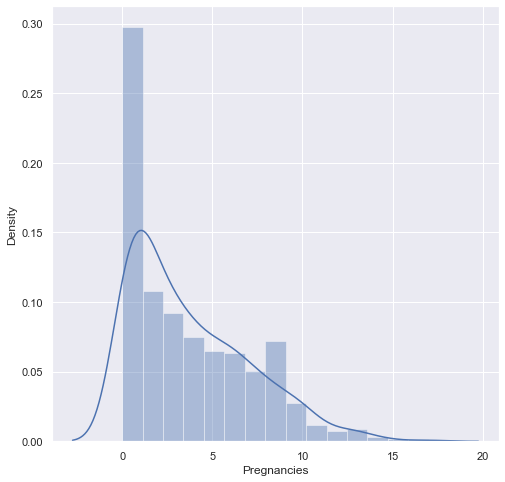

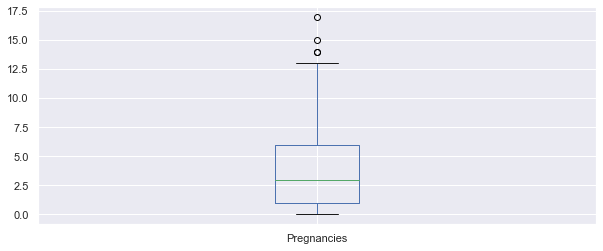

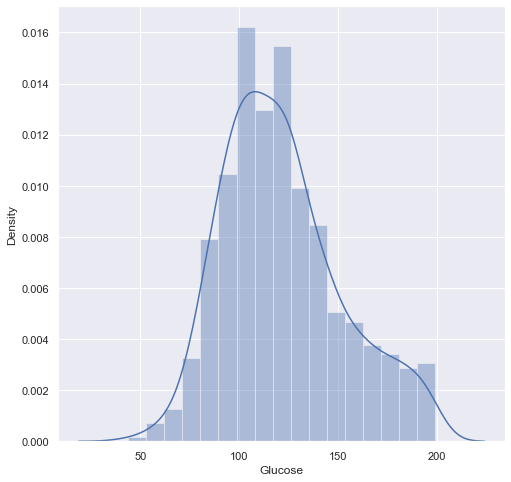

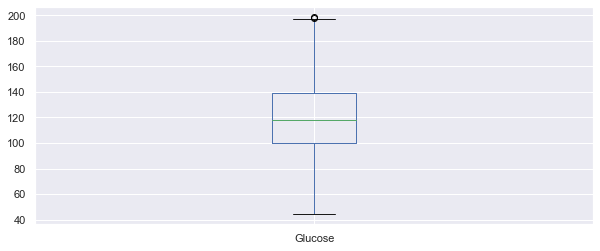

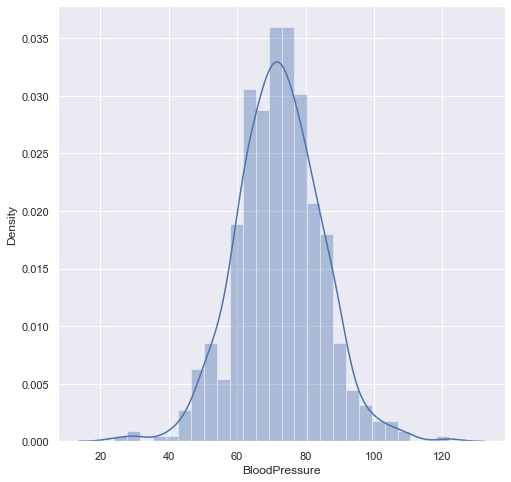

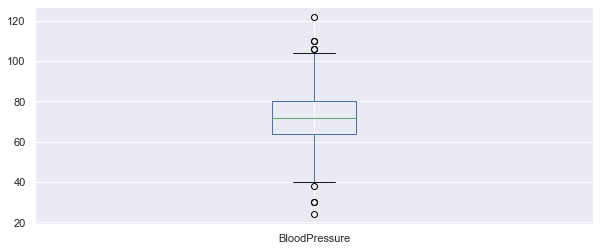

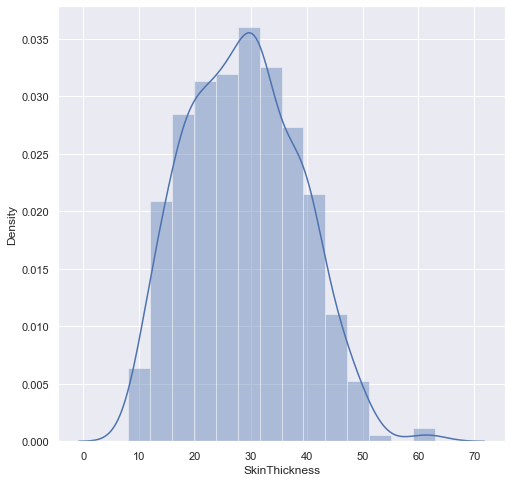

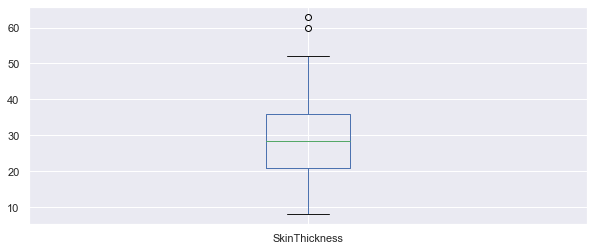

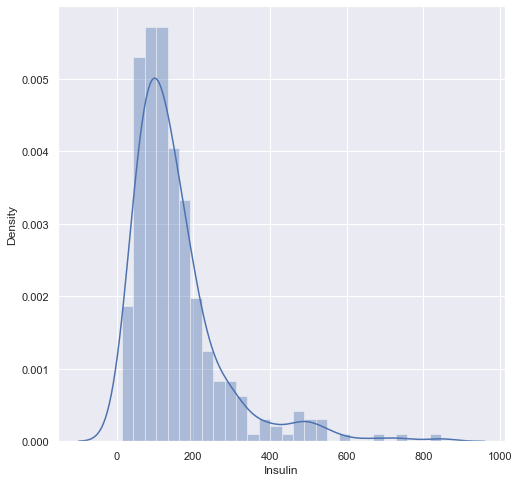

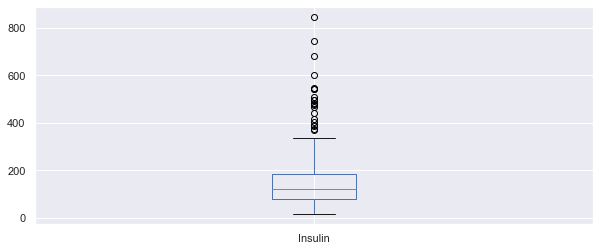

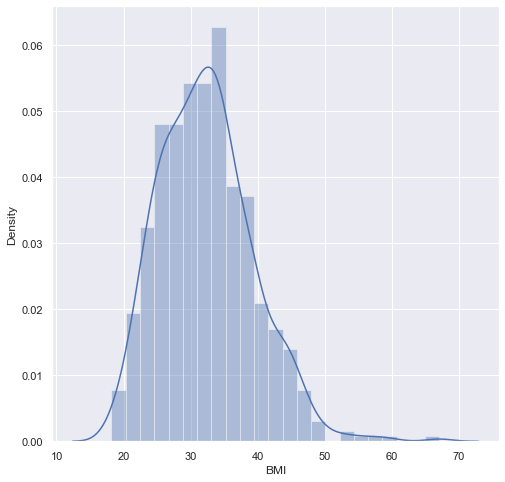

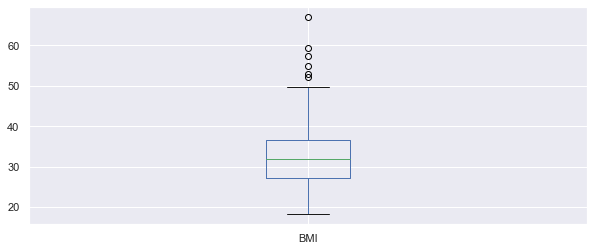

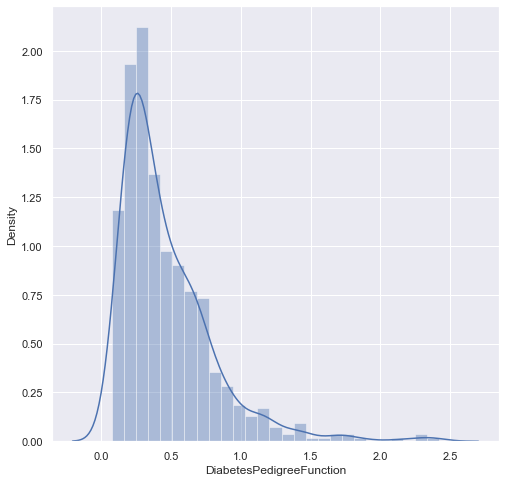

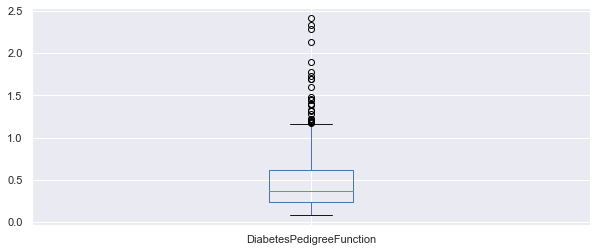

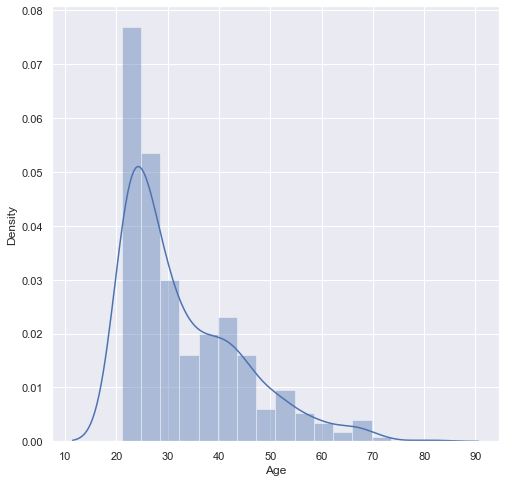

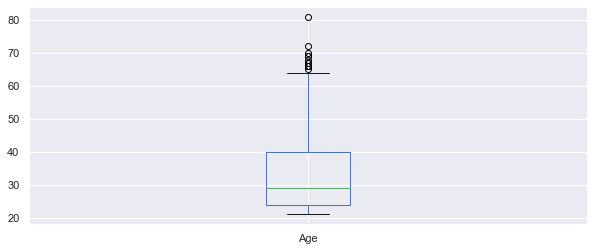

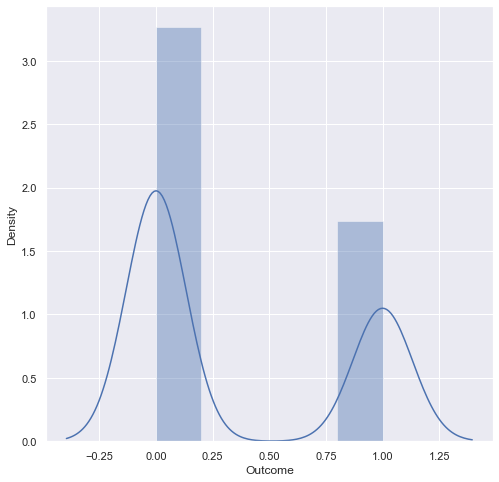

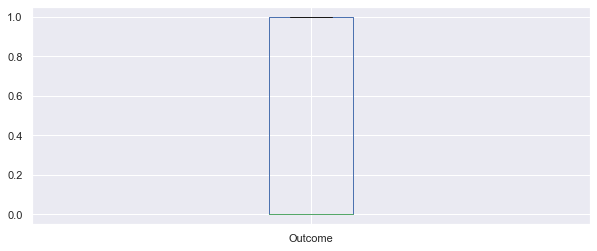

In [18]:
#Numerical features
#train test
distplot_feat(train, train.columns)

In [19]:
#Observaciones:
#Pregnancies: right skewed, presence of outliers, central tendency measure is median, no modal/bimodal, no subpopulations
#Glucose: mildly right skewed, no presence of outliers, central tendency measure is median, no modal/bimodal, no subpopulations
#BloodPressure: almost normal, presence of outliers, central tendency measure is median, no modal/bimodal, no subpopulations
#SkinThickness: almost normal, presence of outliers, central tendency measure is median, no modal/bimodal, no subpopulations
#Insulin: right skewed, presence of outliers, central tendency measure is median, no modal/bimodal, no subpopulations
#BMI: right skewed, presence of outliers, central tendency measure is median, no modal/bimodal, no subpopulations
#DiabetesPedigreeFunction: right skewed, presence of outliers, central tendency measure is median, no modal/bimodal, no subpopulations
#Age: right skewed, presence of outliers, central tendency measure is median, no modal/bimodal, no subpopulations


In [20]:
data_summary(train, target)

,Dtype,Uniques,Nulls,% Nulls,Skew,Kurtosis,Correlation
Outcome,int64,2,0,0.0000,0.6450,-1.5890,1.0000
Glucose,float64,132,5,0.0100,0.5650,-0.1280,0.4910
BMI,float64,224,7,0.0100,0.6600,1.0290,0.3200
Insulin,float64,166,290,0.4700,2.3170,7.1720,0.2840
Age,int64,52,0,0.0000,1.1810,0.9280,0.2810
SkinThickness,float64,46,176,0.2900,0.2400,-0.4180,0.2530
Pregnancies,int64,17,0,0.0000,0.9350,0.3210,0.2080
BloodPressure,float64,43,24,0.0400,0.0040,0.9120,0.1630
DiabetesPedigreeFunction,float64,443,0,0.0000,2.0940,6.5410,0.1550


In [21]:
#II.2 Bivariate Analysis


In [22]:
train.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.0000,609.0000,590.0000,438.0000,324.0000,607.0000,614.0000,614.0000,614.0000
mean,3.7427,121.8473,72.2390,28.5959,154.3302,32.3522,0.4692,32.9072,0.3469
std,3.3133,30.2255,12.3432,9.9605,119.8184,6.9755,0.3368,11.5034,0.4764
min,0.0000,44.0000,24.0000,8.0000,14.0000,18.2000,0.0780,21.0000,0.0000
25%,1.0000,100.0000,64.0000,21.0000,78.0000,27.3000,0.2415,24.0000,0.0000
50%,3.0000,118.0000,72.0000,28.5000,120.0000,32.0000,0.3725,29.0000,0.0000
75%,6.0000,139.0000,80.0000,36.0000,183.2500,36.5000,0.6138,40.0000,1.0000
max,17.0000,199.0000,122.0000,63.0000,846.0000,67.1000,2.4200,81.0000,1.0000


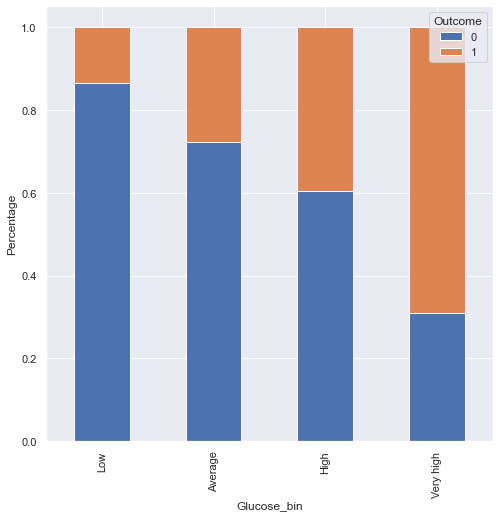

In [23]:
#Glucose
bins=[0,110,120,140,200]
group=["Low","Average","High","Very high"]
train["Glucose_bin"]=pd.cut(train["Glucose"],bins,labels=group)
Income_bin=pd.crosstab(train["Glucose_bin"],train["Outcome"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Glucose_bin")
P=plt.ylabel("Percentage")

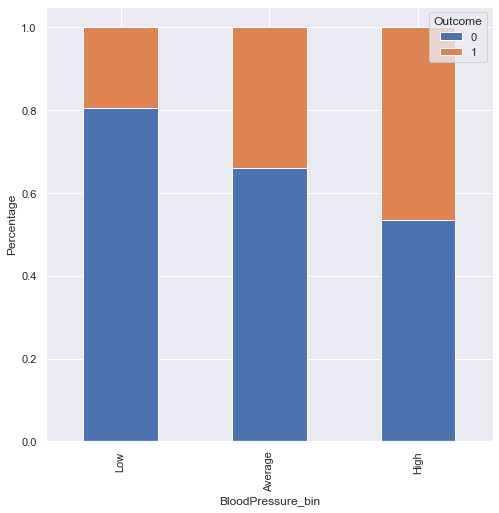

In [24]:
#BloodPressure
bins=[0,60,80,125]
group=["Low","Average","High"]
train["BloodPressure_bin"]=pd.cut(train["BloodPressure"],bins,labels=group)
Income_bin=pd.crosstab(train["BloodPressure_bin"],train["Outcome"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("BloodPressure_bin")
P=plt.ylabel("Percentage")

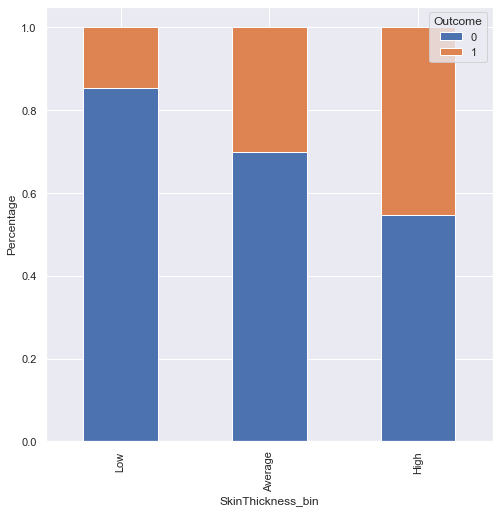

In [25]:
#SkinThickness
bins=[0,20,  30, 65]
group=["Low","Average","High"]
train["SkinThickness_bin"]=pd.cut(train["SkinThickness"],bins,labels=group)
Income_bin=pd.crosstab(train["SkinThickness_bin"],train["Outcome"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("SkinThickness_bin")
P=plt.ylabel("Percentage")

In [26]:
train.Insulin.describe()

count   324.0000
mean    154.3302
std     119.8184
min     14.0000 
25%     78.0000 
50%     120.0000
75%     183.2500
max     846.0000
Name: Insulin, dtype: float64

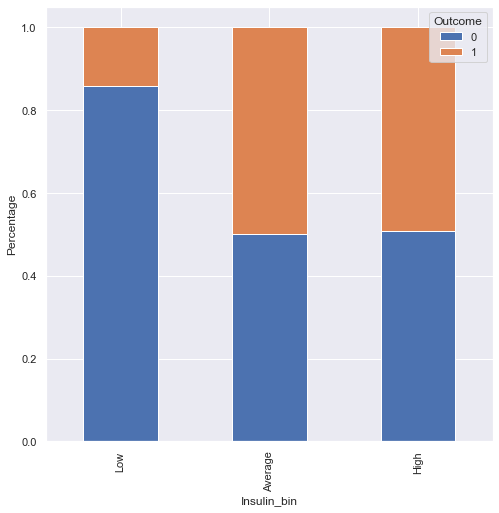

In [27]:
#Insulin
bins=[0,120,200,850]
group=["Low","Average","High"]
train["Insulin_bin"]=pd.cut(train["Insulin"],bins,labels=group)
Income_bin=pd.crosstab(train["Insulin_bin"],train["Outcome"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Insulin_bin")
P=plt.ylabel("Percentage")


In [28]:
train.BMI.describe()

count   607.0000
mean    32.3522 
std     6.9755  
min     18.2000 
25%     27.3000 
50%     32.0000 
75%     36.5000 
max     67.1000 
Name: BMI, dtype: float64

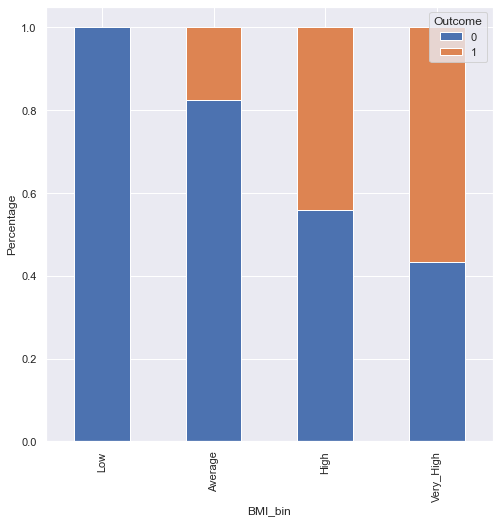

In [29]:
#BMI
bins=[0, 20,30,40,70]
group=["Low","Average","High", "Very_High"]
train["BMI_bin"]=pd.cut(train["BMI"],bins,labels=group)
Income_bin=pd.crosstab(train["BMI_bin"],train["Outcome"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("BMI_bin")
P=plt.ylabel("Percentage")

In [30]:
train.DiabetesPedigreeFunction.describe()

count   614.0000
mean    0.4692  
std     0.3368  
min     0.0780  
25%     0.2415  
50%     0.3725  
75%     0.6138  
max     2.4200  
Name: DiabetesPedigreeFunction, dtype: float64

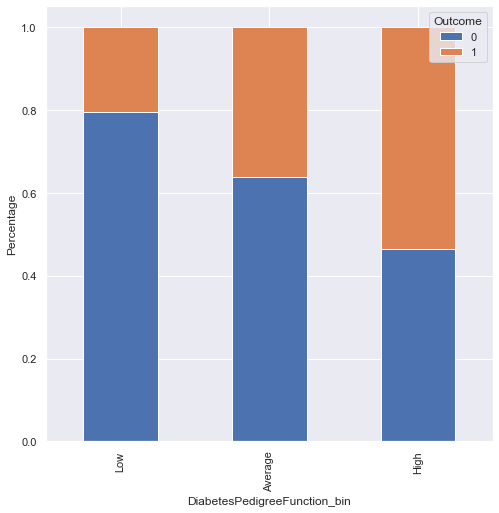

In [31]:
#DiabetesPedigreeFunction
bins=[0, 0.2, 1, 2.5]
group=["Low","Average","High"]
train["DiabetesPedigreeFunction_bin"]=pd.cut(train["DiabetesPedigreeFunction"],bins,labels=group)
Income_bin=pd.crosstab(train["DiabetesPedigreeFunction_bin"],train["Outcome"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("DiabetesPedigreeFunction_bin")
P=plt.ylabel("Percentage")

In [32]:
train.Pregnancies.describe()

count   614.0000
mean    3.7427  
std     3.3133  
min     0.0000  
25%     1.0000  
50%     3.0000  
75%     6.0000  
max     17.0000 
Name: Pregnancies, dtype: float64

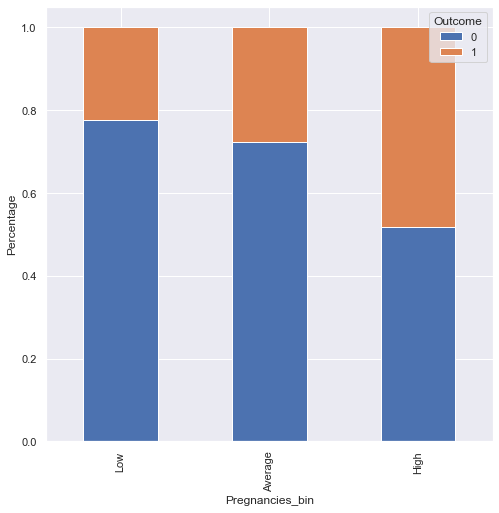

In [33]:
#Pregnancies
bins=[0, 1, 4, 18]
group=["Low","Average","High"]
train["Pregnancies_bin"]=pd.cut(train["Pregnancies"],bins,labels=group)
Income_bin=pd.crosstab(train["Pregnancies_bin"],train["Outcome"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Pregnancies_bin")
P=plt.ylabel("Percentage")

In [34]:
train.Age.describe()

count   614.0000
mean    32.9072 
std     11.5034 
min     21.0000 
25%     24.0000 
50%     29.0000 
75%     40.0000 
max     81.0000 
Name: Age, dtype: float64

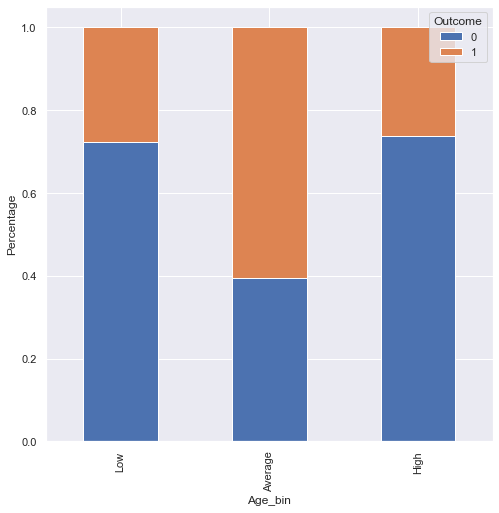

In [35]:
#Age
bins=[20, 40,60, 82]
group=["Low","Average","High"]
train["Age_bin"]=pd.cut(train["Age"],bins,labels=group)
Income_bin=pd.crosstab(train["Age_bin"],train["Outcome"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Age_bin")
P=plt.ylabel("Percentage")

<AxesSubplot:>

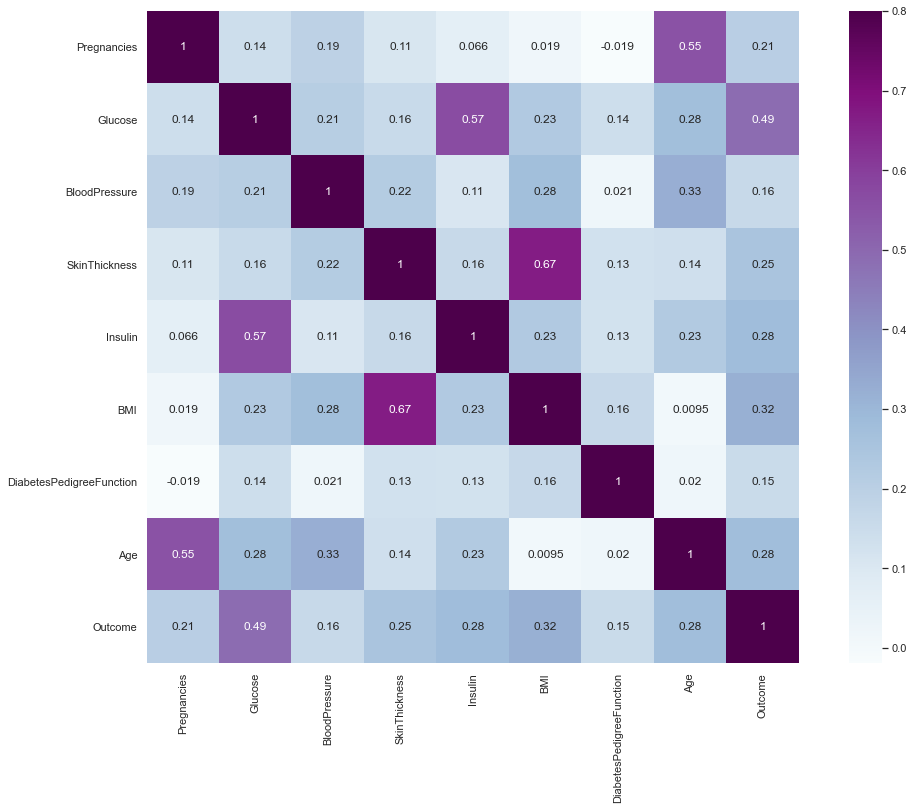

In [36]:
#II.3 PRELIMINAR CORRELATION ANALYSIS
matrix = train.corr()
f, ax = plt.subplots(figsize = (18,12))
sns.heatmap(matrix, vmax = 0.8, square = True, cmap = "BuPu", annot = True)

In [49]:
#II.MISSING VALUES ASSESSMENT
#Train 
null_counts = train.isnull().sum()
null_counts[null_counts > 0]
target = "Outcome"
#Policy for nulls treatment
#For both num and categ will use the most frequent value of each class in the dataset
nulls_num = [c for c in train.select_dtypes(include = "number").columns if train[c].isnull().any()]
nulls_cat = [c for c in train.select_dtypes(exclude = "number").columns if train[c].isnull().any()]

#Nulls imputation

def median_target(df, var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, target]].groupby([target])[[var]].median().reset_index()
    return temp
columns = nulls_num
for i in columns:
    median_target(train, i)
    train.loc[(train[target] == 0 ) & (train[i].isnull()), i] = median_target(train, i)[i][0]
    train.loc[(train[target] == 1 ) & (train[i].isnull()), i] = median_target(train, i)[i][1]
    
def cat_impute(df, cols):
    for col in cols:
        mode_1 = df.loc[(df[target] == 1), col].mode()[0]
        mode_0 = df.loc[(df[target] == 0), col].mode()[0]
        df.loc[(df[target] == 1) & (df[col].isnull()), col] = mode_1
        df.loc[(df[target] == 0) & (df[col].isnull()), col] = mode_0 

cat_impute(train, nulls_cat)


In [ ]:
##IMPUTE TEST SET NOW

In [50]:
train.isnull().sum()

Pregnancies                     0
Glucose                         0
BloodPressure                   0
SkinThickness                   0
Insulin                         0
BMI                             0
DiabetesPedigreeFunction        0
Age                             0
Outcome                         0
Glucose_bin                     0
BloodPressure_bin               0
SkinThickness_bin               0
Insulin_bin                     0
BMI_bin                         0
DiabetesPedigreeFunction_bin    0
Pregnancies_bin                 0
Age_bin                         0
dtype: int64

In [ ]:
#test set
null_counts = test.isnull().sum()
null_counts[null_counts > 0]

In [ ]:
##Policy for nulls treatment
#For both num and categ will use the most frequent value of each class in the dataset
nulls_num_test = ["LoanAmount", "Loan_Amount_Term", "Credit_History"]
nulls_cat_test = [ "Dependents", "Self_Employed", "Gender"]

def impute_test(df, colsNum, colsCat):
    for col in colsNum:
        df.loc[df[col].isnull(), col] = df[col].median()
    for col in colsCat:
        df.loc[df[col].isnull(), col] = df[col].mode()[0]

In [ ]:
impute_test(test, nulls_num_test, nulls_cat_test)

In [ ]:
test.isnull().sum().sum()

In [ ]:
train_78 = train.copy()
test_78 = test.copy()

%store train_78
%store test_78



In [ ]:
#III. FEATURE ENGINEERING
""""Some ideas
• Aggregations (across groups or dates)
• Ratios (divide)
• Interactions (multiply)
• Frequency (counts)
• Pull parts from dates (months/days/hours)"""

In [ ]:
   
#Gender_married feature
train["Gender_Married"] = train["Gender"].astype(str) + "_" + train["Married"].astype(str)
test["Gender_Married"] = test["Gender"].astype(str) + "_" + test["Married"].astype(str)


# #Gender_Education
# Gender_Self_Employed
# Gender_Property_Area
# Gender_Dependents

train["Gender_Education"] = train["Gender"].astype(str) + "_" + train["Education"].astype(str)
test["Gender_Education"] = test["Gender"].astype(str) + "_" + test["Education"].astype(str)

# train["Gender_Self_Employed"] = train["Gender"].astype(str) + "_" + train["Self_Employed"].astype(str)
# train["Gender_Property_Area"] = train["Gender"].astype(str) + "_" + train["Property_Area"].astype(str)
# train["Gender_Dependents"] = train["Gender"].astype(str) + "_" + train["Dependents"].astype(str)

#Binning
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very high"]
train["total_income"] = train["ApplicantIncome"] + train["CoapplicantIncome"] 
train["total_income"]=pd.cut(train["total_income"],bins,labels=group).astype(str)
test["total_income"] = test["ApplicantIncome"] + test["CoapplicantIncome"] 
test["total_income"]=pd.cut(test["total_income"],bins,labels=group).astype(str)

#LoanAmount and Gender
# bins=[0,130,170, 700]
# group=["Low","Average","High"]
# train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group).astype(str)
# train["LoanAmount_Gender"] = train["Gender"].astype(str) + "_" + train["LoanAmount_bin"].astype(str)
# train.drop("LoanAmount_bin", axis = 1, inplace = True)
#CoapplicantIncome
# bins=[0,1200,2300,42000]
# group=["Low","Average","High"]
# train["Coapplicant_Income_bin"]=pd.cut(train["CoapplicantIncome"],bins,labels=group).astype(str)

#LoanAmount
# bins=[0,130,170, 700]
# group=["Low","Average","High"]
# train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group).astype(str)

#CoapplicantIncome
bins=[0,1200,2300,42000]
group=["Low","Average","High"]
train["Coapplicant_Income_bin"]=pd.cut(train["CoapplicantIncome"],bins,labels=group).astype(str)
test["Coapplicant_Income_bin"]=pd.cut(test["CoapplicantIncome"],bins,labels=group).astype(str)


#Frequencies
def freq_count_feat(df):
    
    cat_feats = set(df.select_dtypes(include= object).columns) - set(list(["Loan_ID"]))
    num_feats = df.select_dtypes(exclude= object).columns
    for c in cat_feats:
        df[c +"_"+"freq"] = df.groupby([c])["Loan_ID"].transform("count")
    return df

#New features
# train["Incomes_squared"] = train["ApplicantIncome"] * (train["CoapplicantIncome"] **2)
# test["Incomes_squared"] = test["ApplicantIncome"] * (test["CoapplicantIncome"] **2)
#FE_2
train["coapp_Incomes_squared"] = (train["ApplicantIncome"] + train["CoapplicantIncome"])/(train["LoanAmount"] **2)
test["coapp_Incomes_squared"] = (test["ApplicantIncome"] + test["CoapplicantIncome"])/(test["LoanAmount"] **2)

#FE_3
train["coapp_Incomes_squared"] = (train["ApplicantIncome"] + train["CoapplicantIncome"])/(train["Loan_Amount_Term"] **2)
test["coapp_Incomes_squared"] = (test["ApplicantIncome"] + test["CoapplicantIncome"])/(test["Loan_Amount_Term"] **2)

# #FE_4
# train["Term_Amount_squared"] = (train["LoanAmount"]) * (train["Loan_Amount_Term"] **2)
# test["Term_Amount_squared"] = (test["LoanAmount"]) * (test["Loan_Amount_Term"] **2)

#FE_4
# train["Amount_Coapp_squared"] = (train["LoanAmount"] * train["Loan_Amount_Term"]) / (train["CoapplicantIncome"] **2 + 1)
# test["Amount_Coapp_squared"] = (test["LoanAmount"] * test["Loan_Amount_Term"]) / (test["CoapplicantIncome"] **2 + 1)

train["Amount_history_squared"] = (train["LoanAmount"] / ((train["Credit_History"] + 1)**2))
test["Amount_history_squared"] = (test["LoanAmount"] / ((test["Credit_History"] + 1)**2))

#FE_5

train["term_income"] = train["Loan_Amount_Term"]/(train["ApplicantIncome"] + train["CoapplicantIncome"]**2)
test["term_income"] = test["Loan_Amount_Term"]/(test["ApplicantIncome"] + test["CoapplicantIncome"]**2)

#FE_6
# train["income*history"] = (train["ApplicantIncome"] / train["CoapplicantIncome"]**2) * ((train["Credit_History"] + 1)**2)
# test["income*history"] = (test["ApplicantIncome"] * test["CoapplicantIncome"]**2) * ((test["Credit_History"] + 1)**2)
# train["income*history"] = (train["CoapplicantIncome"]) / ((train["Credit_History"] + 1)**2)
# test["income*history"] = (test["CoapplicantIncome"]) / ((test["Credit_History"] + 1)**2)
# train["Term_Amount_squared"] = (train["LoanAmount"]) / (train["Loan_Amount_Term"] **2)
# test["Term_Amount_squared"] = (test["LoanAmount"]) /(test["Loan_Amount_Term"] **2)

train = freq_count_feat(train)
test = freq_count_feat(test)


In [ ]:
print("Train columns post:", test.columns)

In [ ]:
train.drop("Loan_ID", axis = 1, inplace = True)
test.drop("Loan_ID", axis = 1, inplace = True)

In [ ]:
print("Train columns post:", train.columns)

In [ ]:
#IV. DATA TRANSFORMATION
""""Transform Data
• Numerical
      - Normalize or Standardize
      - Log-transform
      - Remove outliers
• Categorical
      - One-hot encode (nominal)
      - Label encoder (ordinal)
      - Binarize (binary)
• Text
      - Tokenize
      - Stem/Lemma
      - TF-IDF
      - (and much more NLP techniques)"""

In [ ]:
#Check datasets
print("Train set columns before transform:", train.columns)
print("Test set columns before transform:", test.columns)

In [ ]:
#Data transformation
#NUMERICAL FEATURES TRANSFORMATIONS

#TREATMENT OF SKEWED NUMERICAL FEATURES
def feat_transform(all_data):
    cols = all_data.columns
    #Seleccionamos los numeric features only (usamos cols porque esos son los feats que quedaron)
#     numeric_features = all_data.loc[:, list(cols)].dtypes[(all_data.dtypes != "category") & (all_data.dtypes != "uint8")].index
    numeric_features = num
    print(numeric_features)
    # #Calculamos los skewes y los ordenamos...
    skewed_features = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending =False)

    #Seleccionamos los que tengan un abs(skew) >0.7
    skewed_max = pd.DataFrame({"Skew": skewed_features})
    skewed_max  = skewed_max[abs(skewed_max["Skew"]) > 0.7]
    skewed_max.dropna()

    #Aplicamos ahora la BoxCox transformation
    l_opt = {}
    for f in skewed_max.index:
        all_data[f], l_opt[f] = boxcox((all_data[f] + 1))

    #Checking the results...

    skewed_features_2 = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending =False)
    sk_2 = pd.DataFrame({"Skew_before":skewed_features, "Skew_after": skewed_features_2})
    sk_2 = sk_2[abs(sk_2["Skew_before"]) > 0.7].sort_values(by = "Skew_before", ascending = False)
    print(sk_2)
    
    return all_data

In [ ]:
#Train set 

data_summary(df = train.select_dtypes(include = "number"), target = target)

In [ ]:
 train = feat_transform(train)

In [ ]:
data_summary(df = train.select_dtypes(include = "number"), target = target)

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize = (18,12))
sns.heatmap(matrix, vmax = 0.8, square = True, cmap = "BuPu", annot = True)

In [ ]:
#Test set transformations
for c in test[num].columns:
    print(c, ":", test[c].skew(), test[c].kurt())

In [ ]:
 test = feat_transform( test) 

In [ ]:
for c in test[num].columns:
    print(c, ":", test[c].skew(), test[c].kurt())

In [ ]:
#RESCALING OF NUMERICAL FEATURES
test.columns


In [ ]:
#OneHotEncoder
def ohe_mae(df, target):
        #Selecciona todas las cols excepto target
    
    if target!= None:
        df_sel = df.loc[:, df.columns != target]
    else:
        df_sel = df

    cat_feats = df_sel.select_dtypes(include= object).columns
    num_feats = df_sel.select_dtypes(exclude= object).columns
    
    print("Cat features to encode:", cat_feats)

    # creating instance of one-hot-encoder
    enc = OneHotEncoder(handle_unknown='ignore')
    # passing bridge-types-cat column (label encoded values of bridge_types)
    enc_df = pd.DataFrame(enc.fit_transform(df_sel[cat_feats]).toarray())
    
    print("Number of features onehotencoded:", enc_df.shape[1])
    # Rejoin
    df_sel = df_sel[num_feats].join(enc_df)

    #Get back together with target
    if target!= None:
        df = pd.concat((df[target], df_sel), axis = 1)
    else:
        df = df_sel

    return df
    

# OHE train set
train = ohe_mae(train, target)

# OHE test set
test = ohe_mae(test, target = None)

##BINARY ENCODING

#Import the libraries
import category_encoders as ce


#Create object for binary encoding
encoder= ce.BinaryEncoder(cols = train.select_dtypes(include = "object").columns,return_df=True)

data_encoded=encoder.fit_transform(train) 
data_encoded

def binary_encoding(data, target):
        #Selecciona todas las cols excepto target
    
    if target!= None:
        df_sel = data.loc[:, data.columns != target]
    else:
        df_sel = data

    cat_feats = df_sel.select_dtypes(include= object).columns
    num_feats = df_sel.select_dtypes(exclude= object).columns
    
    print("Cat features to encode:", cat_feats)

    # creating instance of one-hot-encoder
#    Create object for binary encoding
    encoder= ce.BinaryEncoder(cols = df_sel[cat_feats].select_dtypes(include = "object").columns,return_df=True)
#     data_encoded=encoder.fit_transform(train) 
    # passing bridge-types-cat column (label encoded values of bridge_types)
    enc_df = pd.DataFrame(encoder.fit_transform(df_sel[cat_feats]))
    
    print("Number of features binnary encoded:", enc_df.shape[1])
    # Rejoin
    df_sel = df_sel[num_feats].join(enc_df)

    #Get back together with target
    if target!= None:
        data= pd.concat((data[target], df_sel), axis = 1)
    else:
        data = df_sel

    return data

# train = binary_encoding(train, target)
# test = binary_encoding(test, target = None)
# train.head()

In [ ]:
#FEATURE REMOVALS
train.drop(["CoapplicantIncome", "ApplicantIncome"], axis = 1, inplace = True)
test.drop(["CoapplicantIncome", "ApplicantIncome"], axis = 1, inplace = True)


In [ ]:
#FEATURE SELECTION TESTING UNIT

#EXHAUSTIVE FEATURE SELECTION
# from mlxtend.feature_selection import  ExhaustiveFeatureSelector

# #Import the algorithm iI want to evaluate my features in
# from sklearn.ensemble import RandomForestClassifier

# #Instatiation
# efs = ExhaustiveFeatureSelector(RandomForestClassifier(),min_features= 4, max_features= 8,
#                                scoring = "accuracy", cv = 2)
t = train.copy()
y = t.pop(target)
X = t

# #Fit
# efs = efs.fit(X,y)

# #Print selected features
# selected_features = X.columns[list(efs.best_idx_)]
# print(selected_features)

# #Print final prediction score
# print(efs.best_score_)



#RANDOM FOREST FEATURE SELECTION
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340, random_state= 42)
model.fit(X,y)
importances = model.feature_importances_
final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
final_df.set_index("Importances").sort_values(by = "Importances", ascending = False)

# final_df.plot.bar(color = "teal")
selected = final_df.sort_values(by = "Importances", ascending = False)[:7]["Features"].values
# final_cols = list(selected) + list([target]) 
# final_cols.remove("CoapplicantIncome")
# final_cols.remove("ApplicantIncome")

In [ ]:
#FEATURE REMOVALS
# train.drop(["CoapplicantIncome", "ApplicantIncome"], axis = 1, inplace = True)
# sel_cols =["Amount_history_squared", "Credit_History", "term_income","coapp_Incomes_squared", "LoanAmount",
#            "LoanAmount", "Property_Area_freq", "Dependents_freq", "Loan_Amount_Term"]
# selected

In [ ]:
# test = test[selected]
# train = train[list(selected) + list(["Loan_Status"])]

In [ ]:
###BASELINE TESTING FOR CHECKING FEATURES

#Baseline
dt = DecisionTreeClassifier(random_state = 42)
scl = StandardScaler()
pipeline = make_pipeline(StandardScaler(), dt)
final_cols = list(num) + list(["Loan_Status"])
# t = train[final_cols].copy()
t = train.copy()
y = t.pop(target)
X = t
scoring ="accuracy"
# X = t.drop("Loan_ID", axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

kfold = StratifiedKFold(n_splits= 10) 
cv_results = cross_val_score(estimator = pipeline, X= X_train , y = y_train , scoring = scoring, cv = kfold)
print("Score:", cv_results.mean())
print("Std_Error:", cv_results.std()) 
      

In [ ]:
lr = LogisticRegression(random_state = 42)
scl = StandardScaler()
pipeline = make_pipeline(StandardScaler(), lr)
final_cols = list(num) + list(["Loan_Status"])
# t = train[final_cols].copy()
t = train.copy()
y = t.pop(target)
X = t
scoring ="accuracy"
# X = t.drop("Loan_ID", axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

kfold = StratifiedKFold(n_splits= 10) 
cv_results = cross_val_score(estimator = pipeline, X= X_train , y = y_train , scoring = scoring, cv = kfold)
print("Score:", cv_results.mean())
print("Std_Error:", cv_results.std())


In [ ]:
# sel_cols =["Amount_history_squared", "Credit_History", "term_income","coapp_Incomes_squared", "LoanAmount",
#            "Loan_Amount", "Property_Area_freq", "Dependents_freq", "Loan_Amount_Term"]
# #


In [ ]:
train.to_csv("new_train_final.csv", index = False)
test.to_csv("new_test_final.csv", index = False)

In [ ]:
set(list(test.columns)) - set(list(train.columns))

In [ ]:
rf = RandomForestClassifier(random_state = 42)
scl = StandardScaler()
pipeline = make_pipeline(StandardScaler(), rf)
final_cols = list(num) + list(["Loan_Status"])
# t = train[final_cols].copy()
t = train.copy()
y = t.pop(target)
X = t
scoring ="accuracy"
# X = t.drop("Loan_ID", axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

kfold = StratifiedKFold(n_splits= 10) 
cv_results = cross_val_score(estimator = pipeline, X= X_train , y = y_train , scoring = scoring, cv = kfold)
print("Score:", cv_results.mean())
print("Std_Error:", cv_results.std()) 

In [ ]:
#Best: FE_5 with [:15] features 0.769755

In [ ]:


#Baseline
dt = DecisionTreeClassifier(random_state = 42)
scl = StandardScaler()
pipeline = make_pipeline(StandardScaler(), dt)
final_cols = list(num) + list(["Loan_Status"])
# t = train[final_cols].copy()
t = train.copy()
y = t.pop(target)
X = t
scoring ="accuracy"
# X = t.drop("Loan_ID", axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

kfold = StratifiedKFold(n_splits= 10) 
for i in range(1, len(selected)):
    sel_col = final_df.sort_values(by = "Importances", ascending = False)[:i]["Features"].values
    cv_results = cross_val_score(estimator = pipeline, X= X_train[sel_col] , y = y_train , scoring = scoring, cv = kfold)
    print("Num selected:", i)
    print("Score:", cv_results.mean())
    print("Std_Error:", cv_results.std()) 

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
feature_names = X_train.columns.values
rf.fit(X_train, y_train)
perm = PermutationImportance(rf).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = feature_names)